In [4]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

# 投資信託のデータを取得する関数
def get_data(DOWNURL):
  # 日付カラムを加工してデータ取得
  DATE_PARSE = lambda date: datetime.strptime(date, "%Y年%m月%d日")
  df = pd.read_csv(DOWNURL, engine="python", encoding="shift-jis", index_col="年月日", parse_dates=True, date_parser=DATE_PARSE)
  return df
  
DATE_PARSE = lambda date: datetime.strptime(date, "%Y年%m月%d日")
# 8つの資産クラスのデータ取得
df_us_stck = get_data("Fund_data/lst_standard_price_us_stck.csv") #アメリカ株式
df_dvp_stck = get_data("Fund_data/lst_standard_price_dvp_stck.csv") #先進国株式
df_emg_stck = get_data("Fund_data/lst_standard_price_emg_stck.csv") #新興国株式
df_dvp_reit = get_data("Fund_data/lst_standard_price_dvp_reit.csv")  # 先進国リート
df_jp_reit = get_data("Fund_data/lst_standard_price_jp_reit.csv")  # 日本リート
df_jp_stck = get_data("Fund_data/lst_standard_price_jp_stck.csv")  # 日本株式
df_jp_stck2 = get_data("Fund_data/lst_standard_price_jp_stck_h.csv")  # 日本株式_貴族
df_jp_bond = get_data("Fund_data/lst_standard_price_jp_bond.csv")  # 日本債券
df_emg_bond = get_data("Fund_data/lst_standard_price_emg_bond.csv")  # 新興国債券
df_gd = get_data("Fund_data/lst_standard_price_gd.csv")  # ゴールド
df_fang = get_data("Fund_data/lst_standard_price_fang.csv")  # FANG


# 取得データを設定期間だけ抽出し結合する関数
def join_data(df_part, df_join, KEYWORD, str_date, end_date):
  """
  引数
    df_part ... 各資産クラスのデータフレーム
    df_join ... 複数の資産クラスを結合したデータフレーム
    KEYWORD ... 資産クラス名
    str_date ... 抽出期間の開始日
    end_date ... 抽出期間の終了日
  戻値
    df_join ... 複数の資産クラスを結合したデータフレーム
  """
  # 各資産クラスのデータフレームを期間抽出
  df_part_fil = df_part.loc[(df_part.index>=str_date)&(df_part.index<=end_date), :]
  df_part_fil = df_part_fil.rename(columns={"基準価額(円)":KEYWORD})[[KEYWORD]]
  # 複数の資産クラスを結合
  df_join = pd.merge(df_join, df_part_fil, left_index=True, right_index=True, how="inner") if df_join is not None else df_part_fil
  return df_join

# 資産クラス名とデータフレームの変数を組み合わせる
dict_assets = {
  "US stock"     : df_us_stck,
  #"DVP stock"     : df_dvp_stck,
  #"EMG stock"     : df_emg_stck,
  #"DVP reit"     : df_dvp_reit,
  #"JP reit"     : df_jp_reit,
  #"JP stock"   : df_jp_stck,
  #"JP stock_h"   : df_jp_stck2,
  #"JP bond"     : df_jp_bond,
  #"EMG bond"     :df_emg_bond,
  "Gold"   : df_gd,
  "FANG"     : df_fang,
}

# 取得データを直近過去5年間だけ抽出し結合
# (※注:  データの日付が抽出期間未満の場合、結合データも少なくなる)
df_join = None
str_date = "2017-02-01"  # 抽出開始日
end_date = "2023-01-31"  # 抽出終了日
# 資産クラス名とデータフレームの変数の組み合わせを横方向に結合
for KEYWORD, df_part in dict_assets.items():
  df_join = join_data(df_part, df_join, KEYWORD, str_date, end_date)
print(df_join)

            US stock   Gold   FANG
年月日                               
2018-01-31     19461  10710  10000
2018-02-01     19574  10828  10007
2018-02-02     19586  10889   9921
2018-02-05     19236  10792   9752
2018-02-06     18306  10749   9263
...              ...    ...    ...
2023-01-24     34943  17896  22793
2023-01-25     34915  17956  22659
2023-01-26     34619  17893  22404
2023-01-27     35084  17769  23137
2023-01-30     35313  17820  23846

[1218 rows x 3 columns]


/var/folders/x0/37shqs5s1j1f34t4r5pk80y00000gp/T/ipykernel_78373/1836571999.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


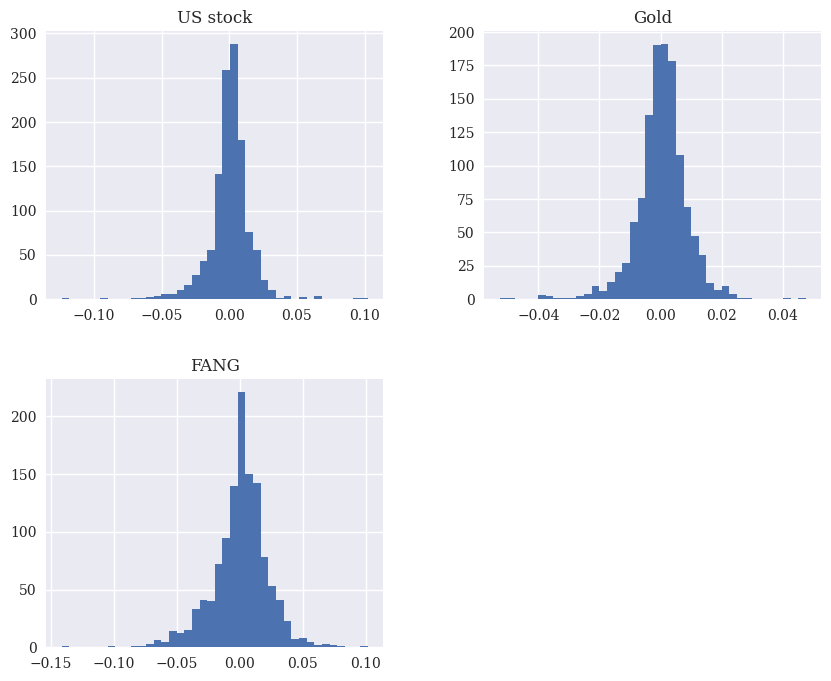

In [5]:
import numpy as np

symbols = ["US stock","Gold","FANG"]
noa = len(symbols)
data = df_join[symbols]
rets = np.log(data / data.shift(1))
rets.hist(bins=40, figsize=(10, 8));

In [9]:
def port_ret(weights):
    return np.sum(rets.mean() * weights) * 252

def port_vol(weights):
    return np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))

prets = []
pvols = []
count = 0
for p in range (100000):
    weights = np.random.random(noa) 
    weights /= np.sum(weights) 
    prets.append(port_ret(weights)) 
    pvols.append(port_vol(weights)) 
    count += 1
    if count%10000 == 0:
      print("processing: "+str(count))
prets = np.array(prets)
pvols = np.array(pvols)

processing: 10000
processing: 20000
processing: 30000
processing: 40000
processing: 50000
processing: 60000
processing: 70000
processing: 80000
processing: 90000
processing: 100000


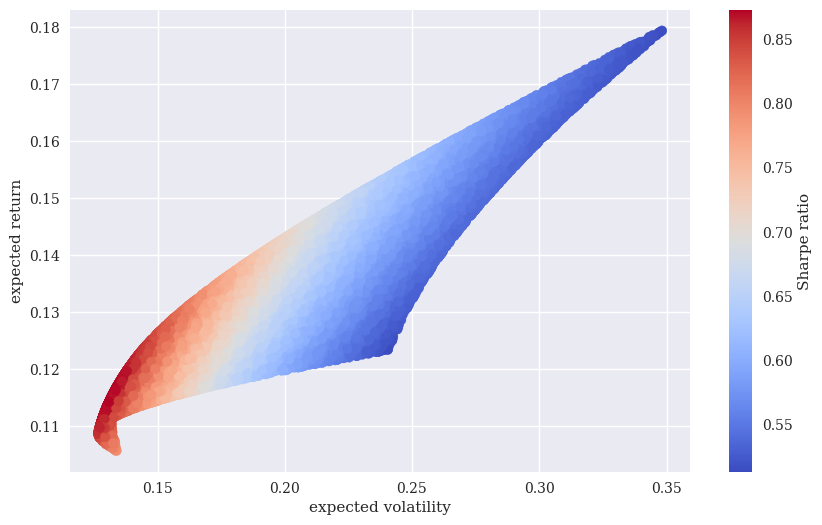

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols,
            marker='o', cmap='coolwarm')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio');

In [11]:
import scipy.optimize as sco
def min_func_sharpe(weights):
    return -port_ret(weights) / port_vol(weights)
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bnds = tuple((0, 1) for x in range(noa))
eweights = np.array(noa * [1. / noa,])
print(eweights)
print(min_func_sharpe(eweights))

[0.33333333 0.33333333 0.33333333]
-0.6740428386262965


In [12]:
%%time
#最小シャープレシオポートフォリオ


opts = sco.minimize(min_func_sharpe, eweights,
                    method='SLSQP', bounds=bnds,
                    constraints=cons)

print(opts)
print(opts['x'].round(3))
print(port_ret(opts['x']).round(3))
print(port_vol(opts['x']).round(3))
print(port_ret(opts['x']) / port_vol(opts['x']))

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.8728474006242802
       x: [ 1.008e-01  7.901e-01  1.091e-01]
     nit: 5
     jac: [ 4.197e-04 -1.548e-04  7.337e-04]
    nfev: 21
    njev: 5
[0.101 0.79  0.109]
0.115
0.132
0.8728474006242802
CPU times: user 18.2 ms, sys: 4.83 ms, total: 23 ms
Wall time: 21.4 ms


In [13]:
#最小分散ポートフォリオ

optv = sco.minimize(port_vol, eweights,
                    method='SLSQP', bounds=bnds,
                    constraints=cons)

print(optv)
print(optv['x'].round(3))
print(port_ret(optv['x']).round(3))
print(port_vol(optv['x']).round(3) )
print(port_ret(optv['x'])/port_vol(optv['x']))

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.12671448241434555
       x: [ 1.816e-01  8.184e-01  1.467e-19]
     nit: 5
     jac: [ 1.267e-01  1.267e-01  1.556e-01]
    nfev: 20
    njev: 5
[0.182 0.818 0.   ]
0.109
0.127
0.8577330042381613


In [14]:
%%time

cons = ({'type': 'eq', 'fun': lambda x: port_ret(x) - tret},
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bnds = tuple((0, 1) for x in weights) 

trets = np.linspace(0.05, 0.2, 100)
tvols = []
for tret in trets:
    res = sco.minimize(port_vol, eweights, method='SLSQP',
                        bounds=bnds, constraints=cons)
    tvols.append(res['fun'])
tvols = np.array(tvols)
tvols

CPU times: user 5.46 s, sys: 5.62 ms, total: 5.46 s
Wall time: 5.46 s


array([0.1346504 , 0.1346504 , 0.1346504 , 0.1346504 , 0.1346504 ,
       0.1346504 , 0.1346504 , 0.1346504 , 0.1346504 , 0.1346504 ,
       0.1346504 , 0.1346504 , 0.1346504 , 0.1346504 , 0.1346504 ,
       0.1346504 , 0.1346504 , 0.1346504 , 0.1346504 , 0.1346504 ,
       0.1346504 , 0.1346504 , 0.1346504 , 0.1346504 , 0.1346504 ,
       0.1346504 , 0.1346504 , 0.1346504 , 0.1346504 , 0.1346504 ,
       0.1346504 , 0.1346504 , 0.1346504 , 0.1346504 , 0.1346504 ,
       0.1346504 , 0.1346504 , 0.13192061, 0.12766482, 0.12683807,
       0.12777275, 0.12893813, 0.13032532, 0.13192815, 0.13373859,
       0.13574834, 0.13794868, 0.14033066, 0.14291894, 0.14580356,
       0.14897412, 0.1524128 , 0.15610188, 0.16002403, 0.16416256,
       0.16850151, 0.17302582, 0.17772133, 0.18257483, 0.18757405,
       0.19270766, 0.1979652 , 0.20333706, 0.20881441, 0.21438917,
       0.22005394, 0.22580194, 0.23162698, 0.23752338, 0.24348597,
       0.24951   , 0.25559112, 0.26172536, 0.26790907, 0.27413

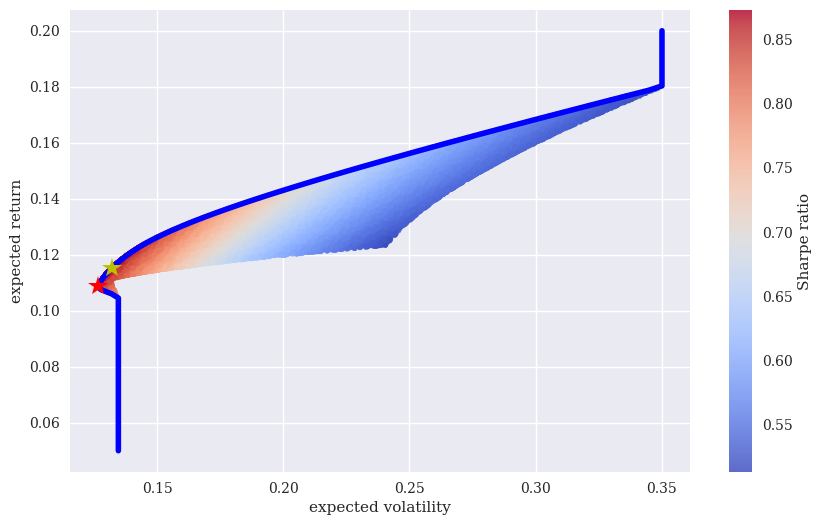

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols,
            marker='.', alpha=0.8, cmap='coolwarm')
plt.plot(tvols, trets, 'b', lw=4.0)
plt.plot(port_vol(opts['x']), port_ret(opts['x']),
        'y*', markersize=15.0)
plt.plot(port_vol(optv['x']), port_ret(optv['x']),
        'r*', markersize=15.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

In [16]:
import scipy.interpolate as sci

ind = np.argmin(tvols)
evols = tvols[ind:]
erets = trets[ind:]


evols, indices = np.unique(evols, return_index=True)
erets = erets[indices]
print(evols)
print(erets)

tck = sci.splrep(evols, erets)

def f(x):
    ''' Efficient frontier function (splines approximation). '''
    return sci.splev(x, tck, der=0)
def df(x):
    ''' First derivative of efficient frontier function. '''
    return sci.splev(x, tck, der=1)

def equations(p, rf=0.01):
    eq1 = rf - p[0] 
    eq2 = rf + p[1] * p[2] - f(p[2])
    eq3 = p[1] - df(p[2])
    return eq1, eq2, eq3

opt = sco.fsolve(equations, [0.01, 0.5, 0.10]) 
print(opt)
np.round(equations(opt), 6)

[0.12683807 0.12777275 0.12893813 0.13032532 0.13192815 0.13373859
 0.13574834 0.13794868 0.14033066 0.14291894 0.14580356 0.14897412
 0.1524128  0.15610188 0.16002403 0.16416256 0.16850151 0.17302582
 0.17772133 0.18257483 0.18757405 0.19270766 0.1979652  0.20333706
 0.20881441 0.21438917 0.22005394 0.22580194 0.23162698 0.23752338
 0.24348597 0.24951    0.25559112 0.26172536 0.26790907 0.27413889
 0.28041176 0.28672485 0.29307556 0.2994615  0.30588046 0.31233041
 0.31880946 0.32531588 0.33184805 0.33840448 0.3449838  0.35003324
 0.35003324 0.35003324 0.35003324 0.35003324 0.35003324 0.35003324
 0.35003324 0.35003324 0.35003324 0.35003324 0.35003324 0.35003324]
[0.10909091 0.11060606 0.11212121 0.11363636 0.11515152 0.11666667
 0.11818182 0.11969697 0.12121212 0.12272727 0.12424242 0.12575758
 0.12727273 0.12878788 0.13030303 0.13181818 0.13333333 0.13484848
 0.13636364 0.13787879 0.13939394 0.14090909 0.14242424 0.14393939
 0.14545455 0.1469697  0.14848485 0.15       0.15151515 0.153

array([ 0.,  0., -0.])

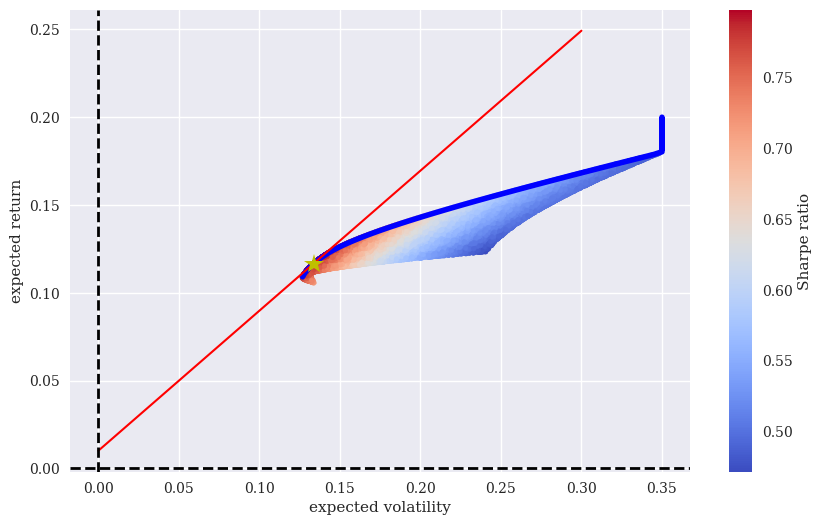

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=(prets - 0.01) / pvols,
marker='.', cmap='coolwarm')
plt.plot(evols, erets, 'b', lw=4.0)
cx = np.linspace(0.0, 0.3)
plt.plot(cx, opt[0] + opt[1] * cx, 'r', lw=1.5)
plt.plot(opt[2], f(opt[2]), 'y*', markersize=15.0)
plt.grid(True)
plt.axhline(0, color='k', ls='--', lw=2.0)
plt.axvline(0, color='k', ls='--', lw=2.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

In [18]:
cons = ({'type': 'eq', 'fun': lambda x: port_ret(x) - f(opt[2])},
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}) 
res = sco.minimize(port_vol, eweights, method='SLSQP',
                    bounds=bnds, constraints=cons)

print(res['x'].round(3))
print(port_ret(res['x']))
print(port_vol(res['x']))
print(port_ret(res['x']) / port_vol(res['x']))
res

[0.081 0.789 0.13 ]
0.11657719420222183
0.13362606210900463
0.8724136022741186


 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.13362606210900463
       x: [ 8.132e-02  7.886e-01  1.300e-01]
     nit: 6
     jac: [ 1.422e-01  1.196e-01  2.131e-01]
    nfev: 24
    njev: 6